In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

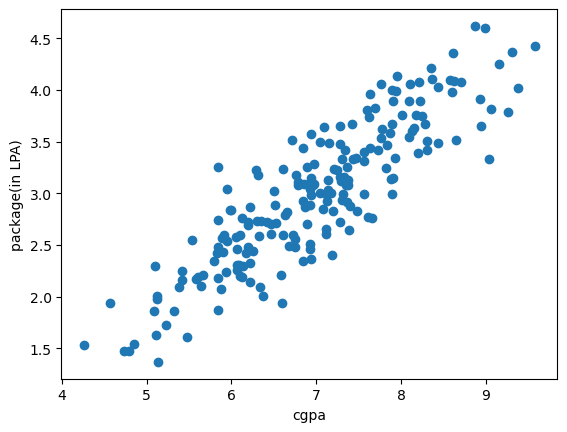

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(in LPA)')
plt.show()

In [6]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

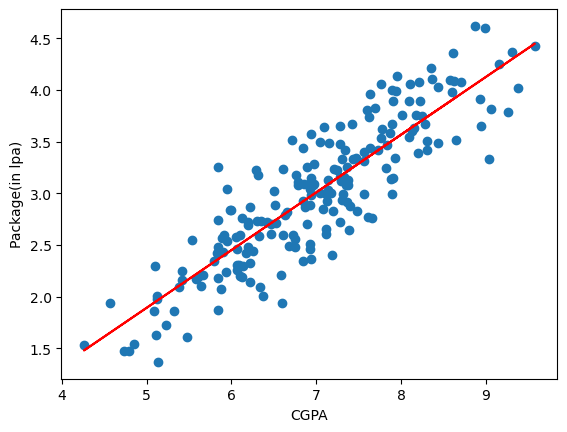

In [8]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [9]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score

In [10]:
y_pred = lr.predict(x_test)

In [11]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [12]:
print('MAE:',mean_absolute_error(y_test,y_pred))

MAE: 0.2884710931878175


In [13]:
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 0.12129235313495527


In [14]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.34827051717731616


In [15]:
print('R2_score:',r2_score(y_test,y_pred))

R2_score: 0.780730147510384


In [16]:
# Adjusted R2 score

r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - ((1-r2)*(40-1)/(40-1-1))

In [17]:
adj_r2

0.7749598882343415

In [18]:
ndf = df.copy()

ndf['random'] = np.random.random(200)

ndf = ndf[['cgpa','random','package']]
ndf.sample(5)

,cgpa,random,package
162,5.53,0.554668,2.55
153,7.94,0.506351,3.99
22,6.14,0.396881,2.30
169,9.31,0.087642,4.37
131,6.37,0.342982,2.01


Text(0, 0.5, 'package(in lpa)')

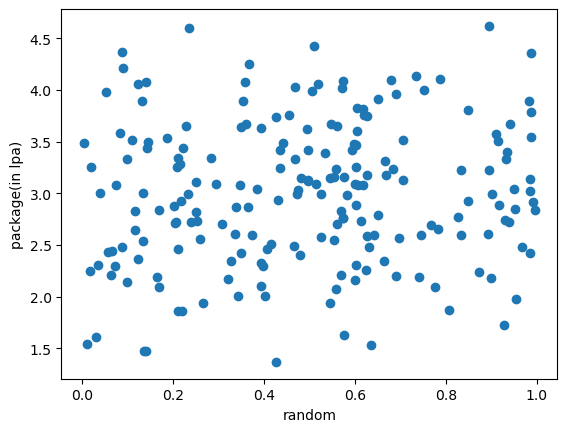

In [19]:
plt.scatter(ndf['random'],ndf['package'])
plt.xlabel('random')
plt.ylabel('package(in lpa)')

In [20]:
x = ndf.iloc[:,0:2]
y = ndf.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test)

print("R2 score",r2_score(y_test,y_pred))

r2 = r2_score(y_test,y_pred)

R2 score 0.781893915871056


In [22]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7701043978100319

In [23]:
ndf2 = df.copy()

ndf2['iq'] = ndf2['package'] + (np.random.randint(-12,12,200)/10)

ndf2 = ndf2[['cgpa','iq','package']]
ndf2.sample(5)

,cgpa,iq,package
187,6.26,3.04,2.44
51,9.26,3.49,3.79
115,8.35,5.11,4.21
72,7.78,4.02,3.62
101,6.71,2.32,3.52


Text(0, 0.5, 'package(in lpa)')

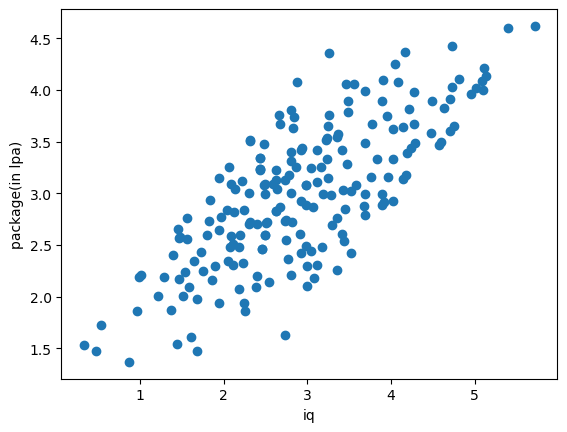

In [24]:
plt.scatter(ndf2['iq'],ndf2['package'])
plt.xlabel('iq')
plt.ylabel('package(in lpa)')

In [25]:
np.random.randint(-100,100)

-100

In [26]:
x = ndf2.iloc[:,0:2]
y = ndf2.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

print("R2 score",r2_score(y_test,y_pred))

r2 = r2_score(y_test,y_pred)

R2 score 0.8239440740838136


In [27]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8144275375478036